In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Get Daily data

In [1]:
! wget https://covidtracking.com/api/states.csv --no-check-certificate

--2020-03-22 13:36:52--  https://covidtracking.com/api/states.csv
Resolving covidtracking.com (covidtracking.com)... 2604:a880:400:d0::72a:f001, 104.248.63.231
Connecting to covidtracking.com (covidtracking.com)|2604:a880:400:d0::72a:f001|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 5527 (5.4K) [text/csv]
Saving to: ‘states.csv.2’

states.csv.2        100%[===================>]   5.40K  --.-KB/s    in 0s      

2020-03-22 13:36:52 (56.1 MB/s) - ‘states.csv.2’ saved [5527/5527]



In [2]:
! wget http://covidtracking.com/api/states/daily.csv --no-check-certificate

--2020-03-22 13:36:52--  http://covidtracking.com/api/states/daily.csv
Resolving covidtracking.com (covidtracking.com)... 2604:a880:400:d0::72a:f001, 104.248.63.231
Connecting to covidtracking.com (covidtracking.com)|2604:a880:400:d0::72a:f001|:80... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from covidtracking.com attempted to set domain to cape.io
Length: 40525 (40K) [text/csv]
Saving to: ‘daily.csv.2’

daily.csv.2         100%[===================>]  39.58K  --.-KB/s    in 0.02s   

2020-03-22 13:36:52 (1.57 MB/s) - ‘daily.csv.2’ saved [40525/40525]



In [19]:
states = pd.read_csv('states.csv')
daily = pd.read_csv('daily.csv')
daily['date']= pd.to_datetime(daily['date'],format='%Y%m%d')
daily['frac'] = daily['positive']/daily['total']
daily = daily[daily['state']!='AS']
# remove territories
states = states[states['state']!='AS']
states = states[states['state']!='MP']
states = states[states['state']!='GU']
states = states[states['state']!='PR']
states = states[states['state']!='VI']

In [21]:
dates = np.sort(daily['date'].unique())

## Total # of positive cases

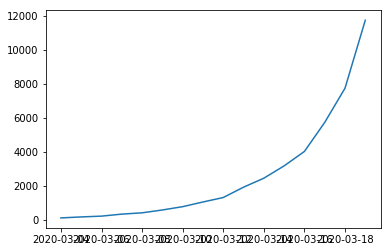

In [22]:
plt.plot(dates, daily.groupby('date')['positive'].sum())

In [23]:
len(np.sort(daily['date'].unique()))

16

## Normalized # of cases for each state

Number of cases for each state, normalized (divide by the largest # of cases in each state), with linear (slope = 1) line for reference.

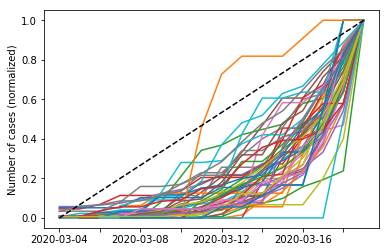

In [24]:
state_list = states['state']
fig, ax = plt.subplots()
for state in state_list:
    S =daily[daily['state'] == state]
    
    plt.plot(S['date'],S['positive']/max(S['positive']))#,S['date'],S['negative'],S['date'],S['total'])
    plt.ylabel('Number of cases (normalized)')
    every_nth = 2
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
plt.plot(np.sort(daily['date'].unique()),[r/15 for r in range(0,16)],linestyle='dashed',color='black')
plt.show()

Visualize each state

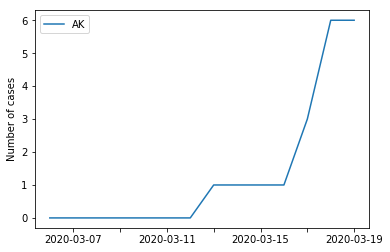

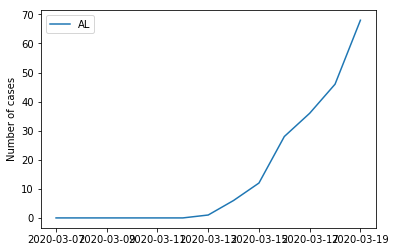

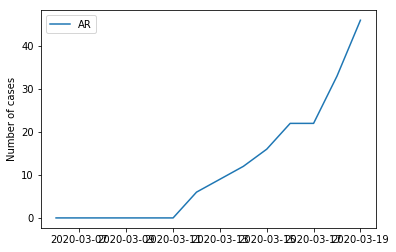

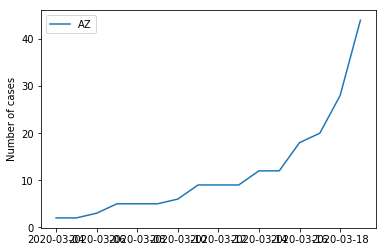

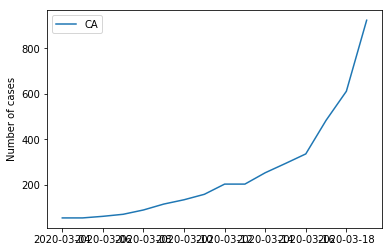

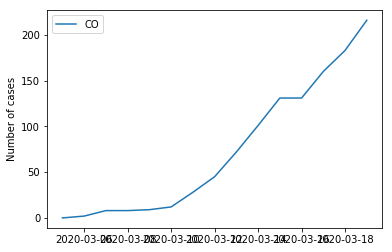

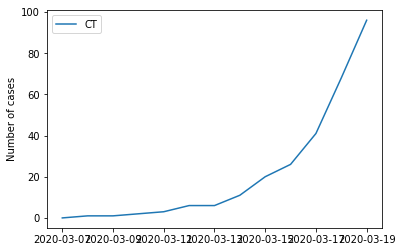

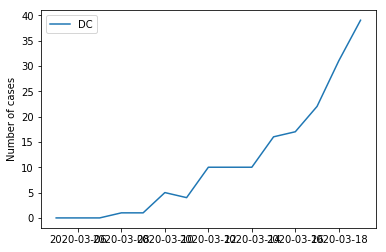

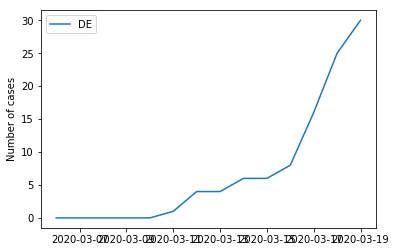

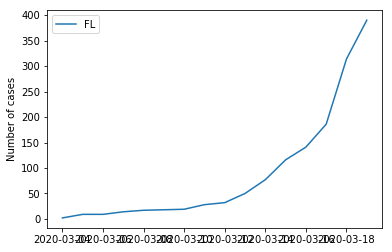

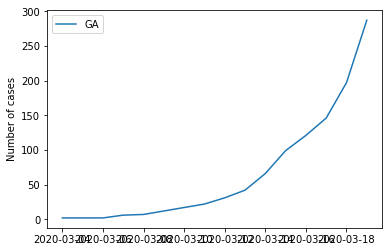

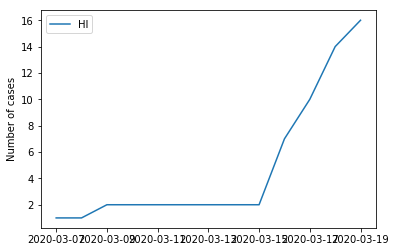

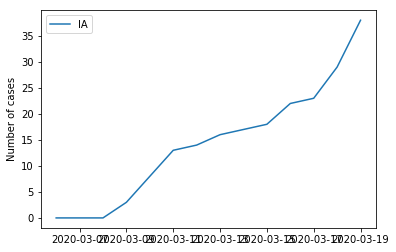

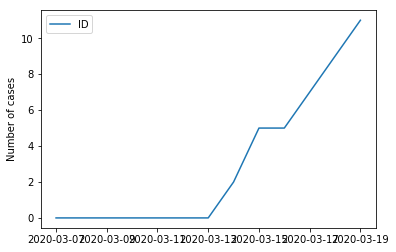

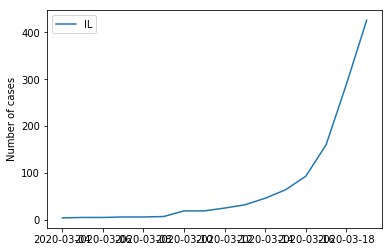

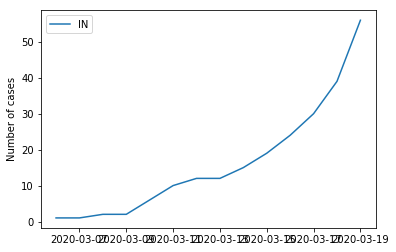

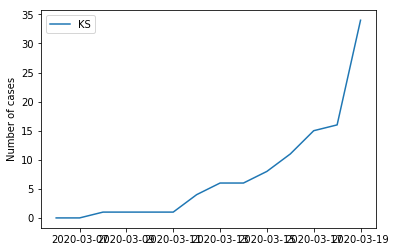

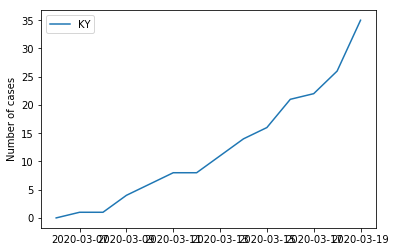

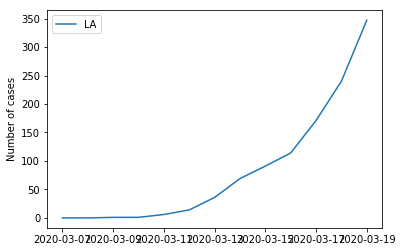

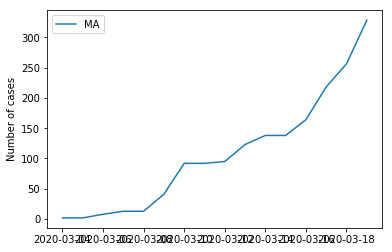

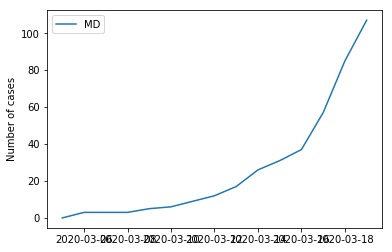

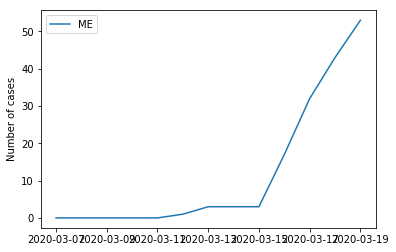

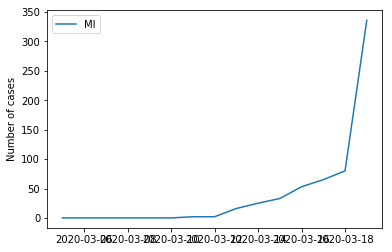

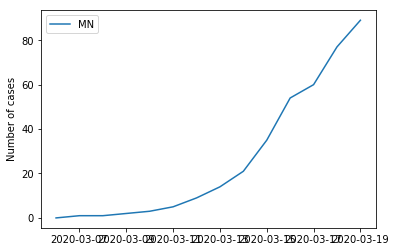

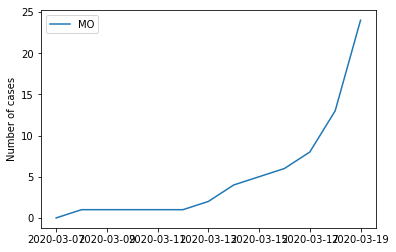

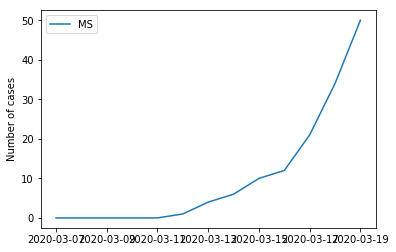

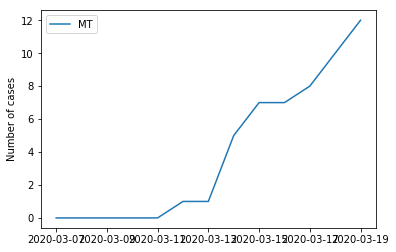

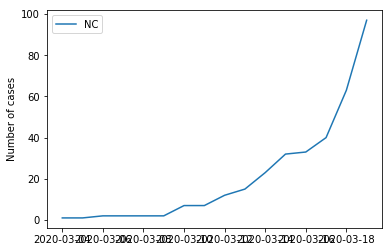

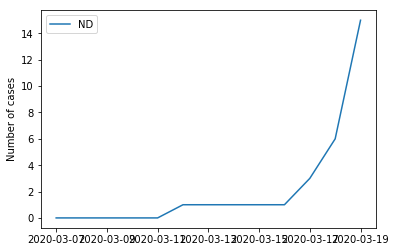

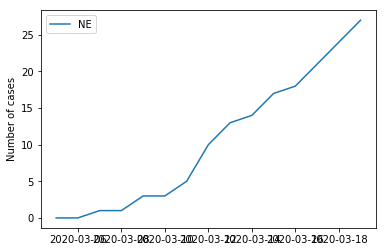

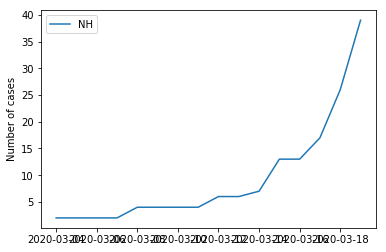

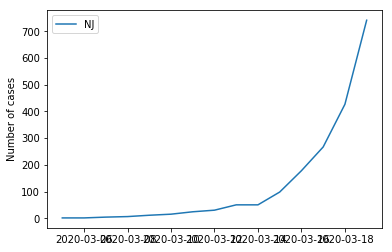

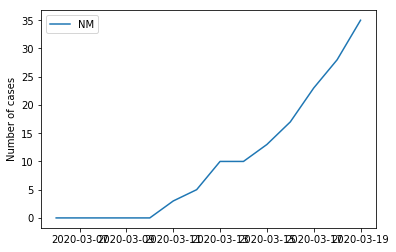

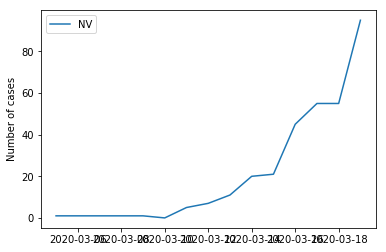

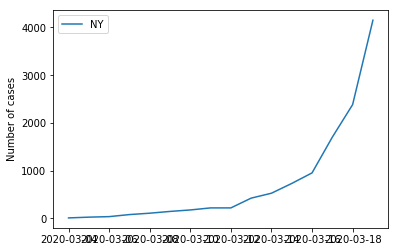

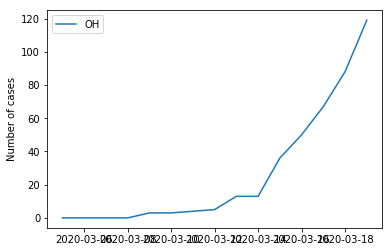

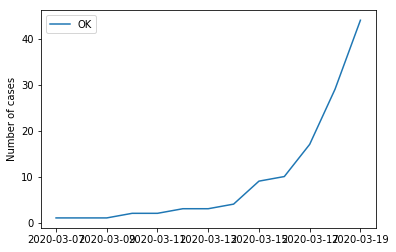

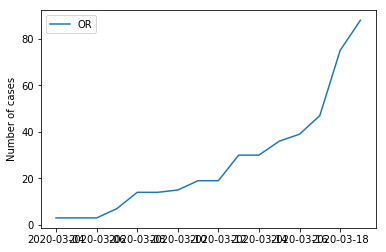

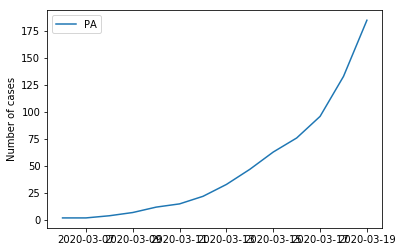

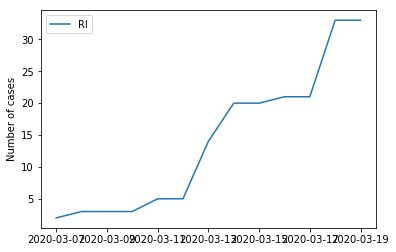

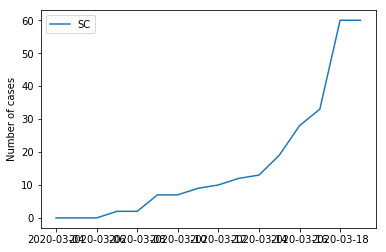

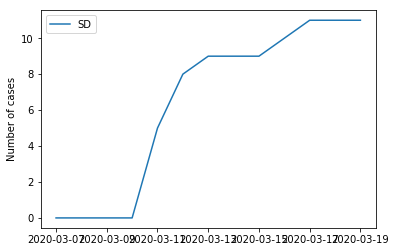

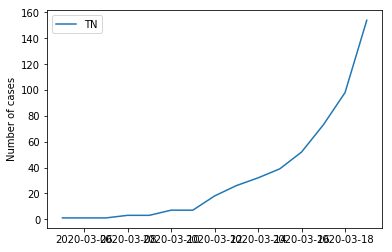

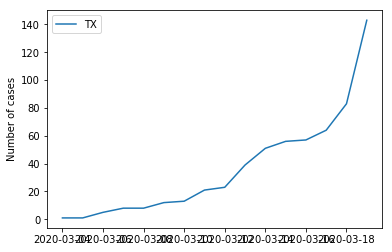

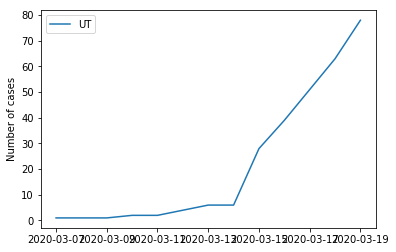

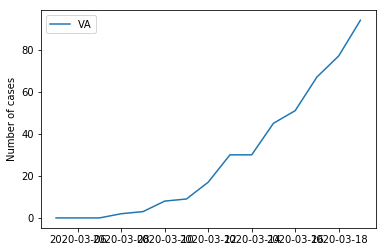

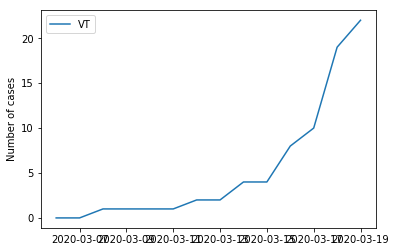

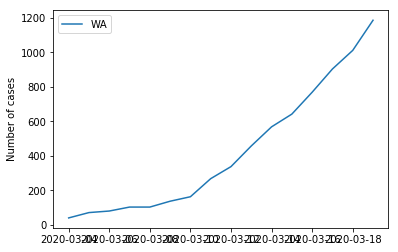

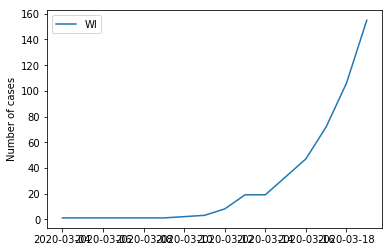

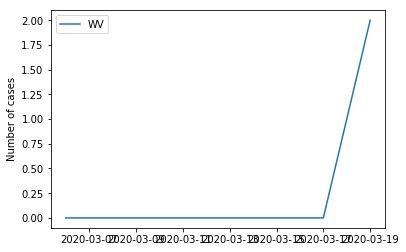

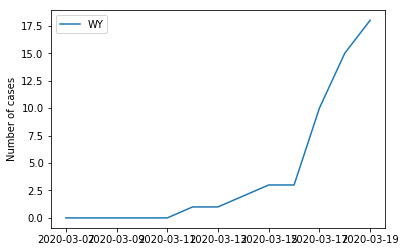

In [10]:
state_list = states['state']
fig, ax = plt.subplots()
for state in state_list:
    S =daily[daily['state'] == state]
    
    plt.plot(S['date'],S['positive'])#,S['date'],S['negative'],S['date'],S['total'])
    plt.ylabel('Number of cases')
    every_nth = 2
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
    plt.legend([state])
    plt.show()

Pull out a specific state (South Dakota, which seems to be the only one with a slower than linear increase.

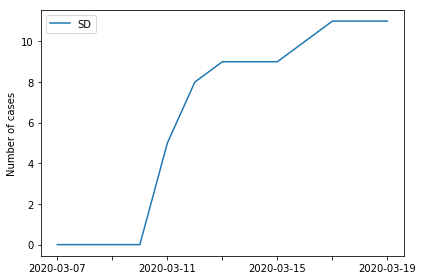

In [11]:
state_list = states['state']
fig, ax = plt.subplots()
S =daily[daily['state'] == 'SD']

plt.plot(S['date'],S['positive'])#,S['date'],S['negative'],S['date'],S['total'])
plt.ylabel('Number of cases')
every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.legend(['SD'])
plt.tight_layout()
plt.show()


### Fraction of positive cases out of all tests

total positive # of cases / total # of tests, per day

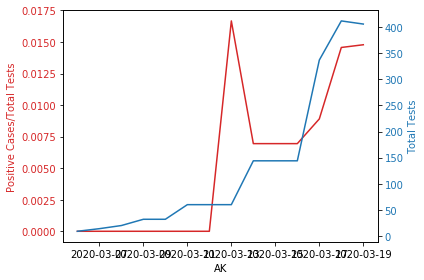

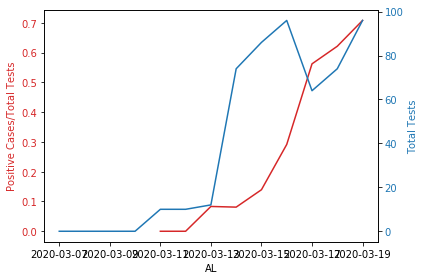

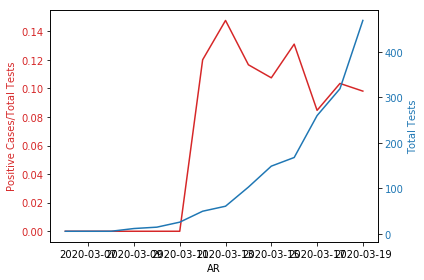

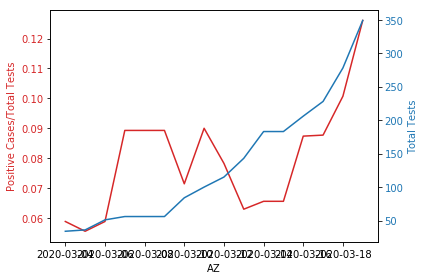

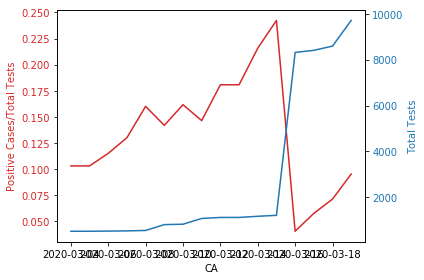

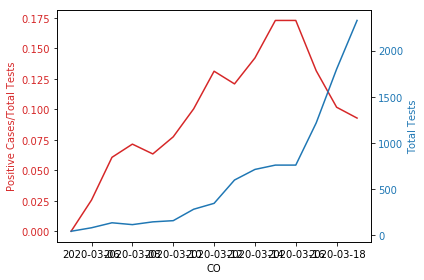

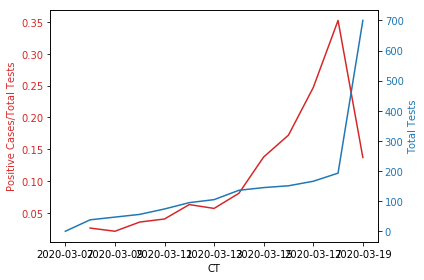

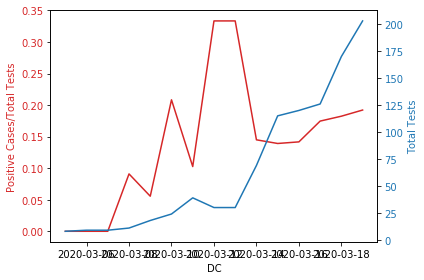

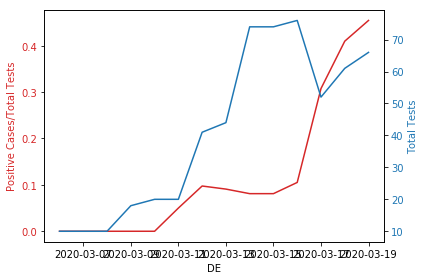

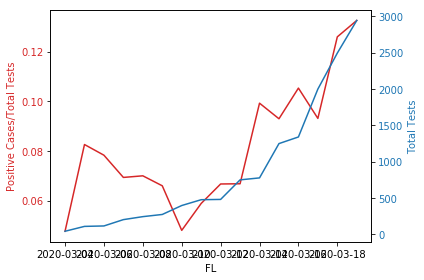

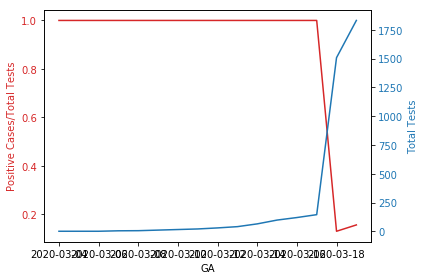

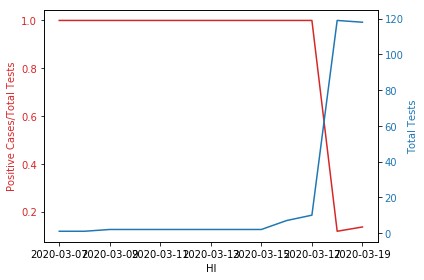

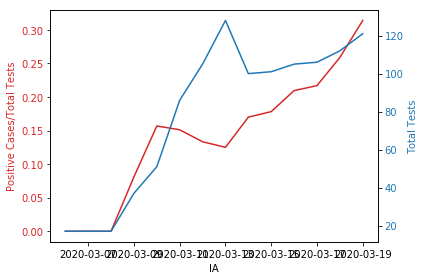

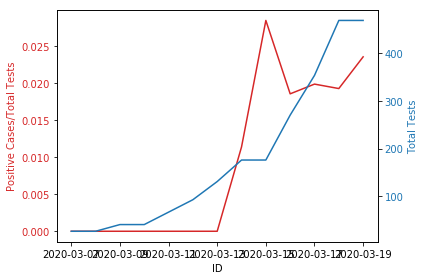

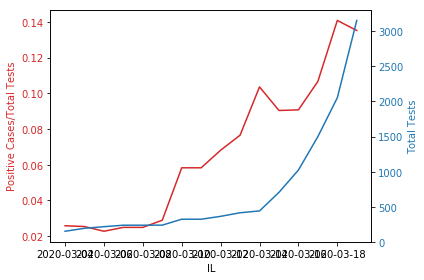

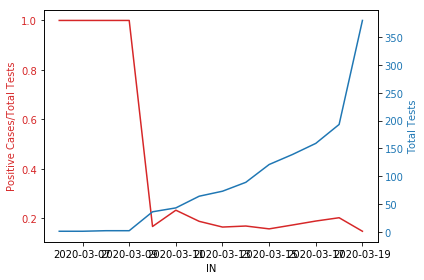

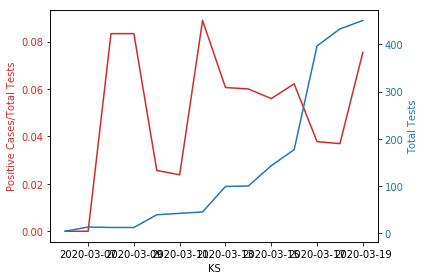

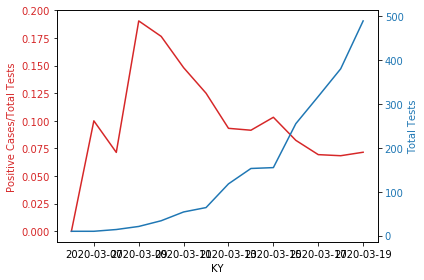

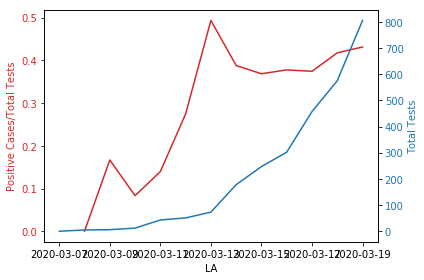

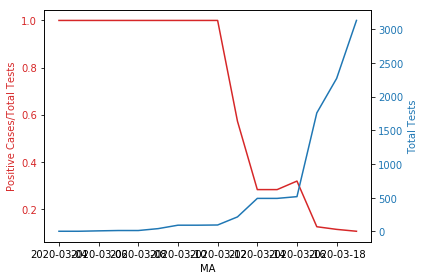

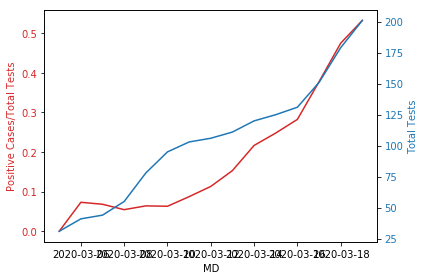

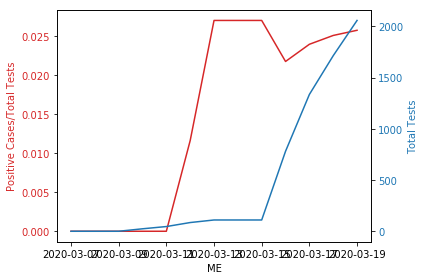

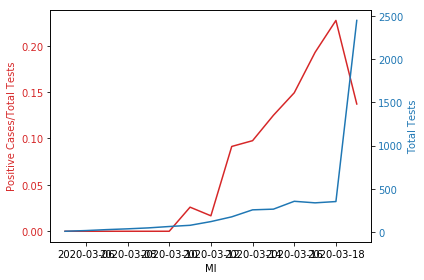

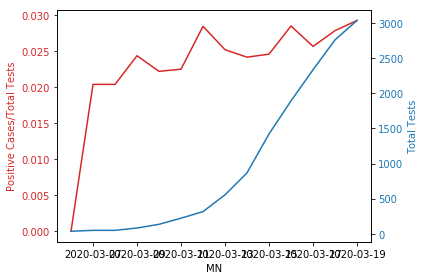

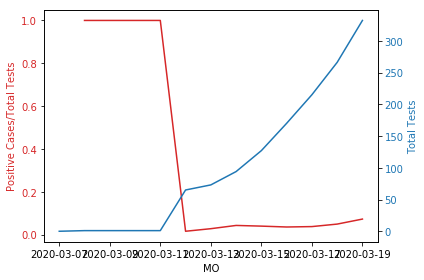

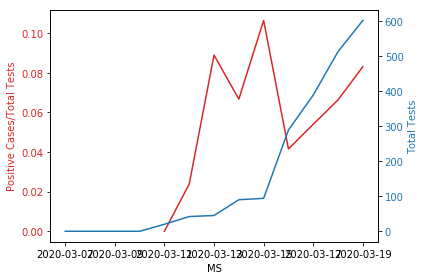

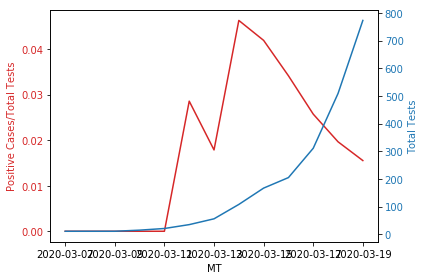

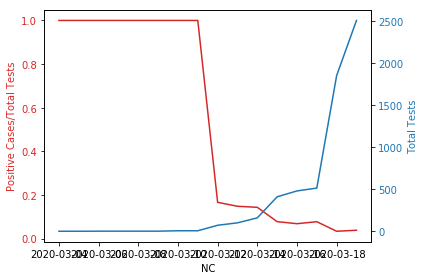

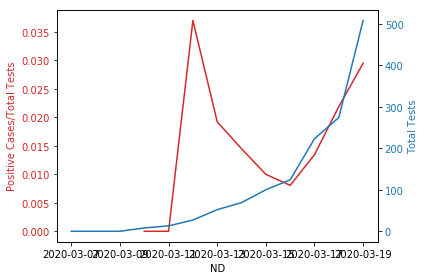

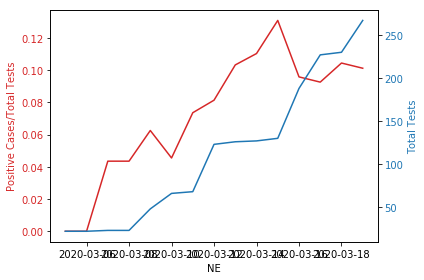

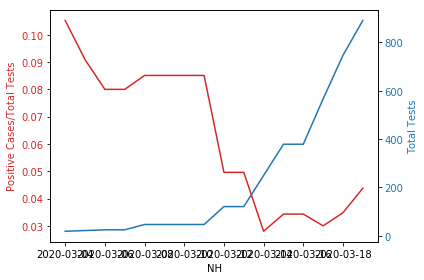

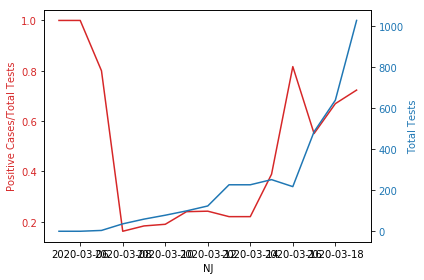

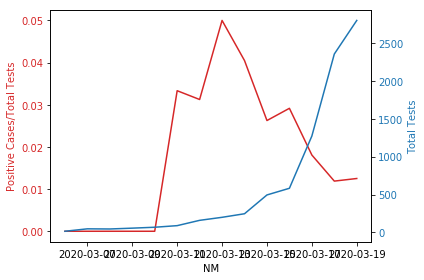

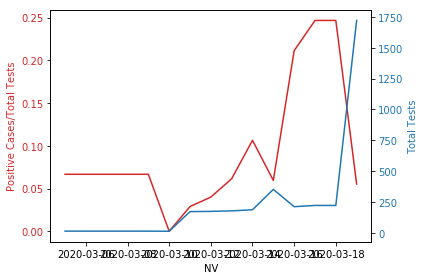

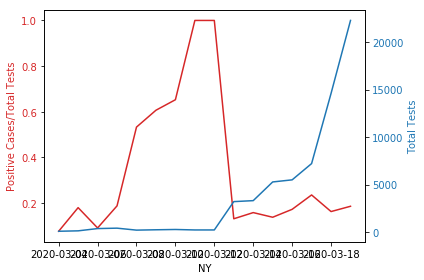

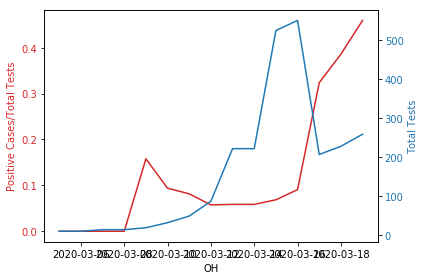

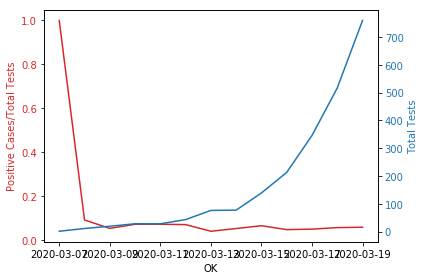

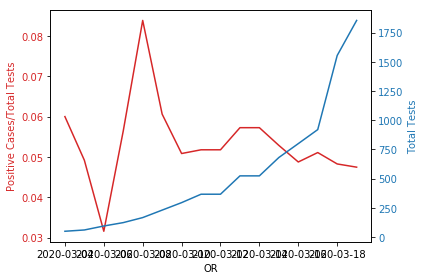

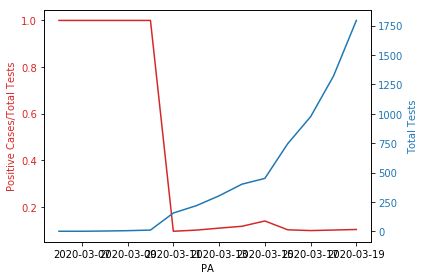

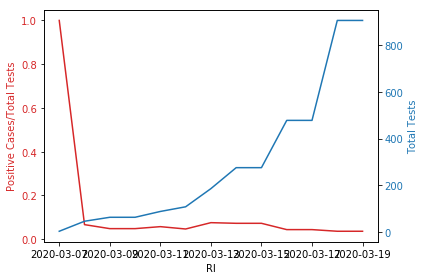

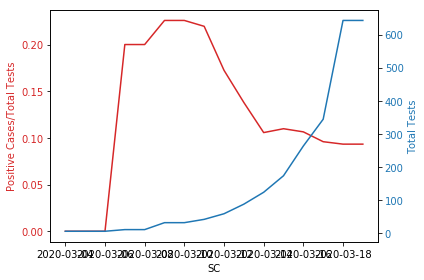

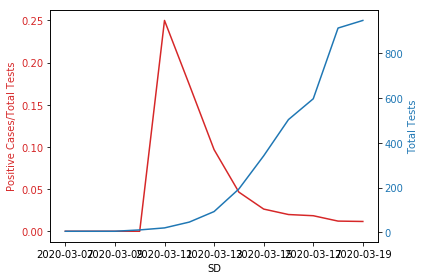

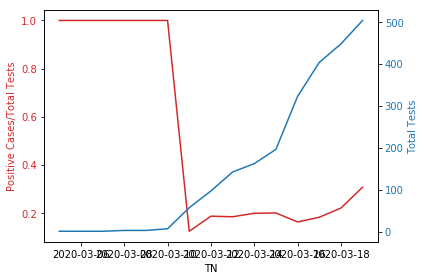

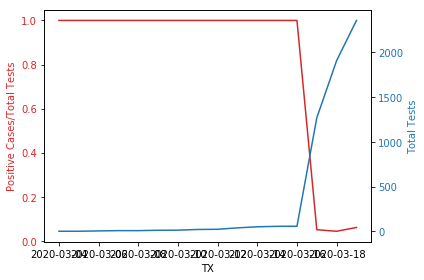

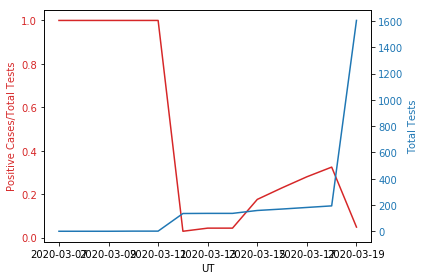

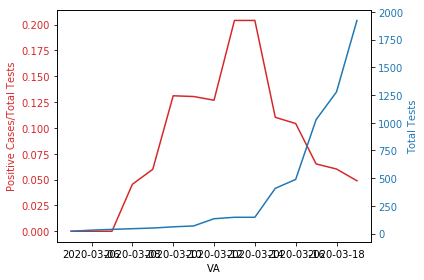

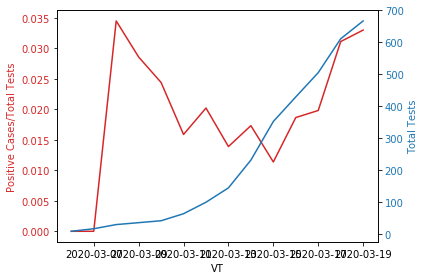

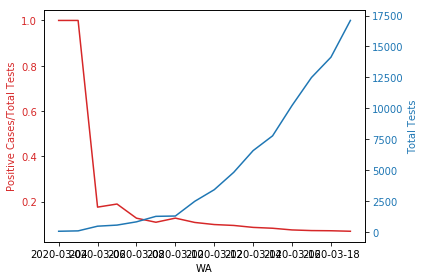

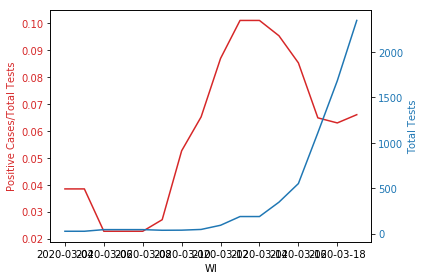

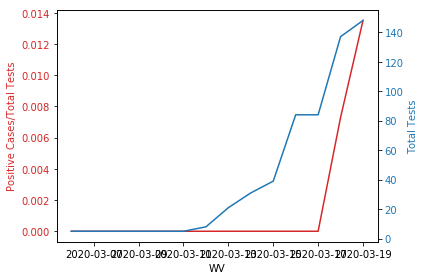

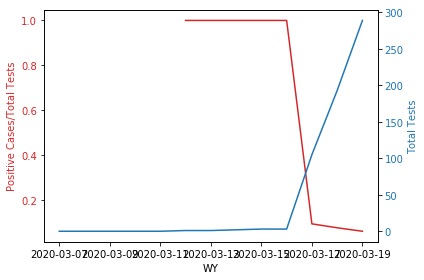

In [36]:
state_list = states['state']

for state in state_list:
    S =daily[daily['state'] == state]
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel(state)
    ax1.set_ylabel('Positive Cases/Total Tests', color=color)
    ax1.plot(S['date'],S['frac'],color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Total Tests', color=color)  # we already handled the x-label with ax1
    ax2.plot(S['date'], S['total'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    every_nth = 2
    for n, label in enumerate(ax1.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

## Deaths

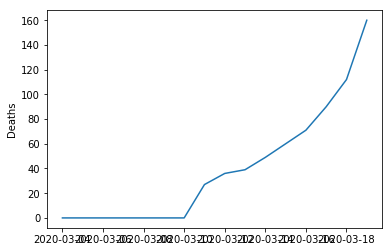

In [62]:
plt.plot(dates, daily.groupby('date')['death'].sum())
plt.ylabel('Deaths')
dlist = []
for state in state_list:
    S = daily[daily['state']==state]
    if S['death'].sum()!=0:
        dlist.append(state)

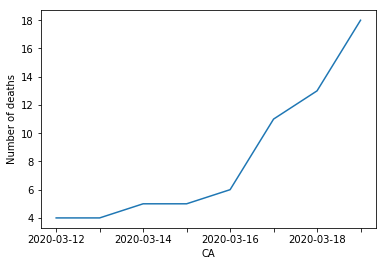

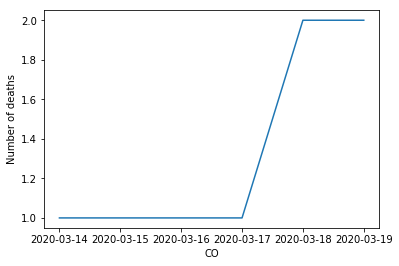

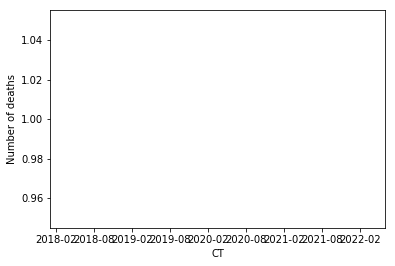

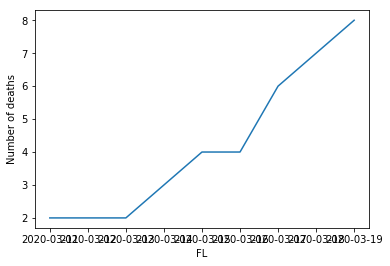

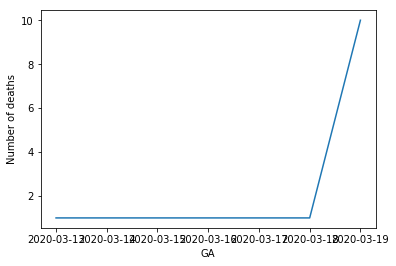

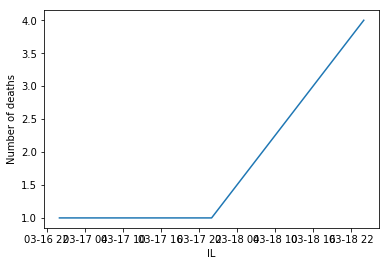

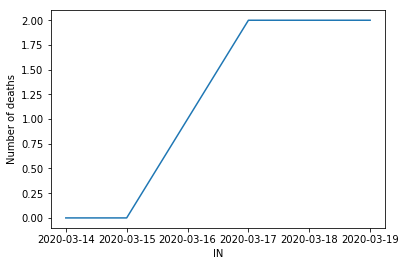

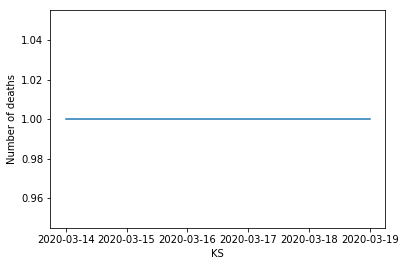

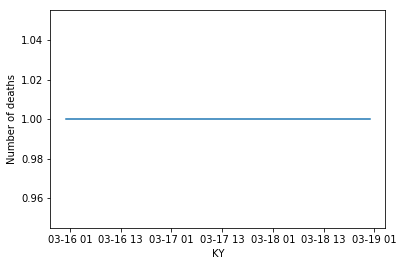

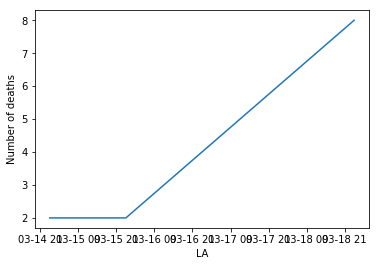

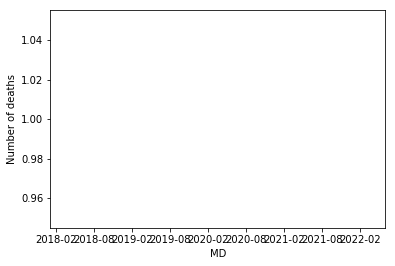

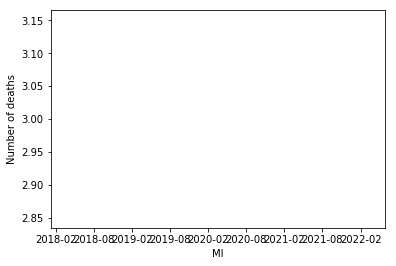

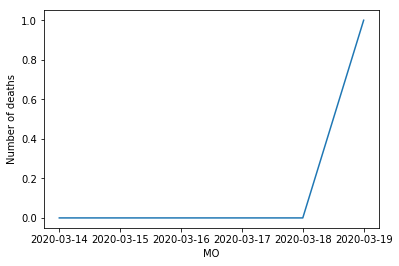

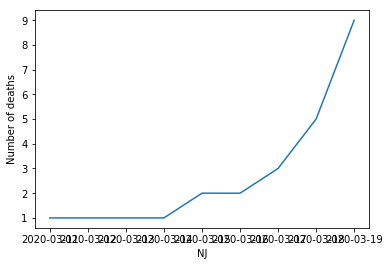

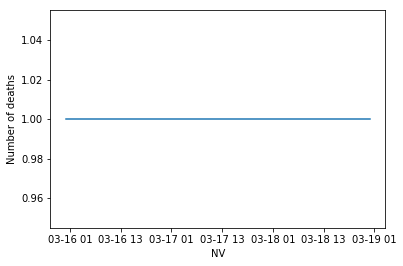

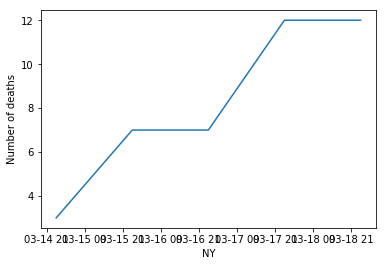

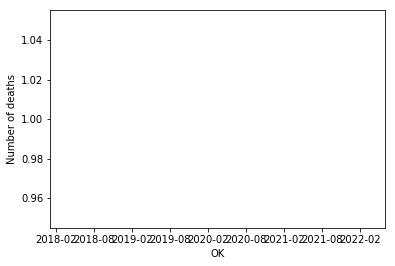

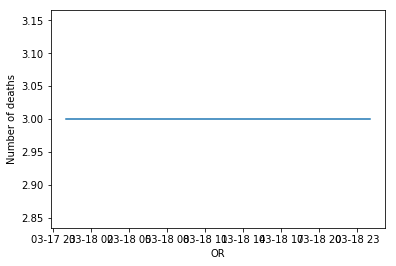

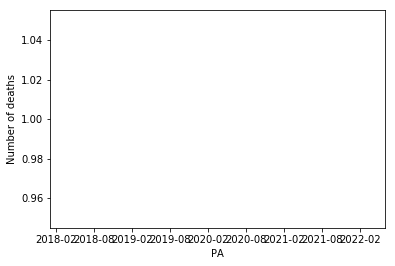

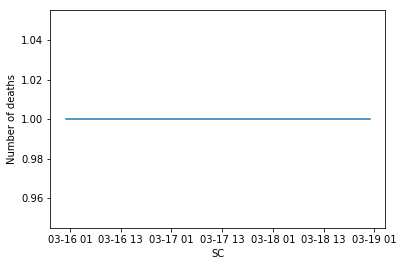

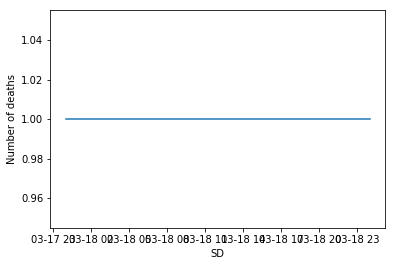

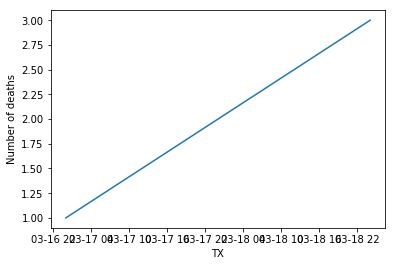

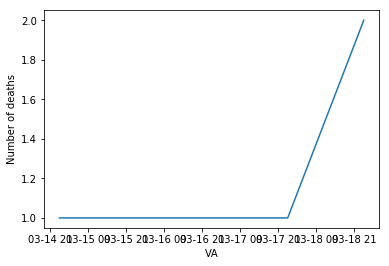

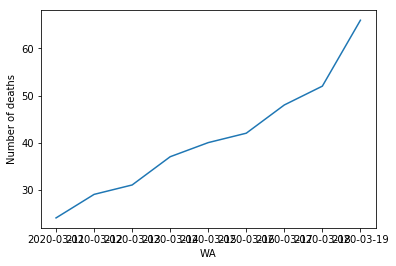

In [61]:

fig, ax = plt.subplots()
for state in dlist:
    S =daily[daily['state'] == state]
    
    plt.plot(S['date'],S['death'])#,S['date'],S['negative'],S['date'],S['total'])
    plt.ylabel('Number of deaths')
    plt.xlabel(state)
    every_nth = 2
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
    plt.show()